In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.fftpack as fft
import pylab as pl

Make fake test data:

In [3]:
# Number of samplepoints
N = 1024

# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N)
y = np.sin(20.0 * 2.0*np.pi*x) + np.sin(80.0 * 2.0*np.pi*x)

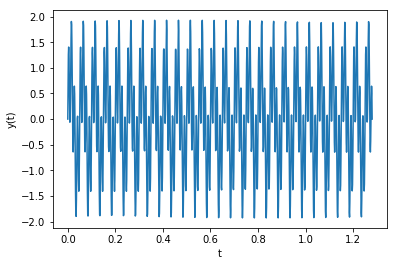

In [4]:
pl.plot(x,y)
pl.xlabel("t")
pl.ylabel("y(t)")
pl.show()

---

Do FFT:

In [5]:
yff = fft.fft(y)

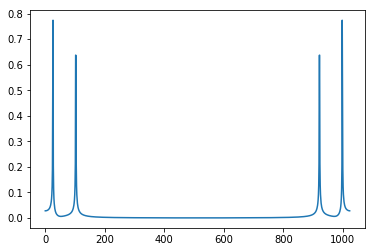

In [6]:
fig, ax = pl.subplots()
ax.plot(2./N * np.abs(yff))
pl.show()

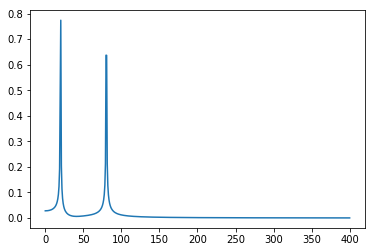

In [7]:
f = np.linspace(0.0, 1.0/(2*T), N//2)

fig, ax = pl.subplots()
ax.plot(f, 2./N * np.abs(yff[:N//2]))
pl.show()

---

Do DFT:

In [8]:
def dft(y):
    N = np.size(y)
    X = np.zeros((N,),dtype=np.complex128)
    for m in range(0,N):
        for n in range(0,N):
            X[m] += y[n]*np.exp(-np.pi*2j*m*n/N)
    return X

In [9]:
yfd = dft(y)

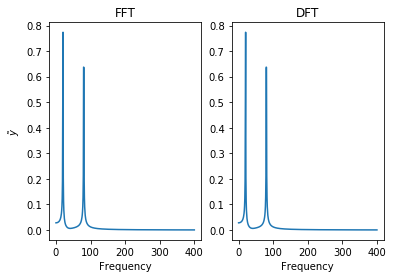

79.84344422700586
79.84344422700586


In [10]:
pl.subplot(121)
pl.plot(f[:N//2], 2./N * np.abs(yff[:N//2]))
pl.xlabel("Frequency")
pl.ylabel(r"$\tilde{y}$")
pl.title("FFT")
pl.subplot(122)
pl.plot(f[:N//2], 2./N * np.abs(yfd[:N//2]))
pl.xlabel("Frequency")
pl.title("DFT")
pl.show()

print(f[np.argmax(yff[:N//2])])
print(f[np.argmax(yfd[:N//2])])

---

Do NFT:

In [11]:
def ndft(y,x):
    N = np.size(y)
    dx= x[1]-x[0]
    T = dx*N
    X = np.zeros((N,),dtype=np.complex128)
    for m in range(0,N):
        for n in range(0,N):
            X[m] += y[n]*np.exp(-np.pi*2j*m*x[n]/T)
    return X

In [12]:
yfn = ndft(y,x)

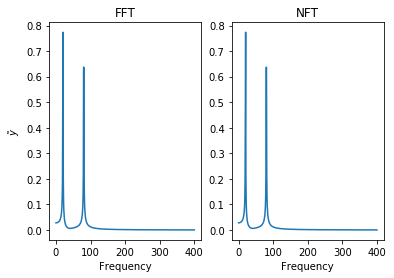

79.84344422700586
79.84344422700586


In [13]:
pl.subplot(121)
pl.plot(f[:N//2], 2./N * np.abs(yff[:N//2]))
pl.xlabel("Frequency")
pl.ylabel(r"$\tilde{y}$")
pl.title("FFT")
pl.subplot(122)
pl.plot(f[:N//2], 2./N * np.abs(yfn[:N//2]))
pl.xlabel("Frequency")
pl.title("NFT")
pl.show()

print(f[np.argmax(yff[:N//2])])
print(f[np.argmax(yfn[:N//2])])

---

Do FT:

In [14]:
def ndft2(y, f, x):
    M = len(f)
    N = len(y)
    X = np.zeros((M,),dtype=np.complex128)
    for m in range(0,M):
        for n in range(0,N):
            X[m] += y[n]*np.exp(-2j*np.pi*f[m]*x[n])
    return X

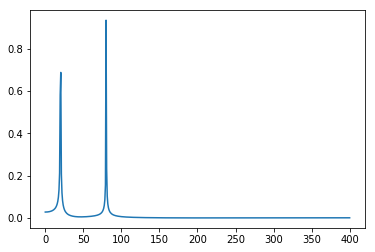

In [15]:
f2 = np.linspace(0, 1.0/(2*T), N/2)
yf2 = ndft2(y,f2,x)

pl.subplot(111)
pl.plot(f2, 2./N * np.abs(yf2))
pl.show()

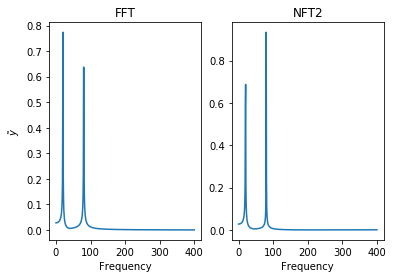

19.569471624266143


In [16]:
pl.subplot(121)
pl.plot(f, 2./N * np.abs(yff[:N//2]))
pl.xlabel("Frequency")
pl.ylabel(r"$\tilde{y}$")
pl.title("FFT")
pl.subplot(122)
pl.plot(f2, 2./N * np.abs(yf2))
pl.xlabel("Frequency")
pl.title("NFT2")
pl.show()

print(f2[np.argmax(yf2)])

In [17]:
print(np.allclose(yfd,yff,rtol=1e-12))

True


What is going on with the amplitudes...(!?)